In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker

In [3]:
dir = '/work/mh0033/m301036/LSAT/Data/ERA5/'

# Read in data
ds = xr.open_dataset(dir+'ERA20C-ERA5_190001-202212.nc')
ds

<xarray.Dataset>
Dimensions:    (time: 1476, longitude: 360, latitude: 181)
Coordinates:
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2022-12-01
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
Data variables:
    msl        (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Jul 09 10:29:51 2023: cdo mergetime temp1_inv.nc temp2....
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [4]:
ds = ds.astype(np.float64)
# ds['msl'] = ds['msl']/100.0
# ds['msl'].attrs['units'] = 'hPa'
ds

<xarray.Dataset>
Dimensions:    (time: 1476, latitude: 181, longitude: 360)
Coordinates:
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2022-12-01
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
Data variables:
    msl        (time, latitude, longitude) float64 1.011e+05 ... 1.023e+05
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Jul 09 10:29:51 2023: cdo mergetime temp1_inv.nc temp2....
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [5]:
#calculate the monthly mean anomalies
ds_clim = ds.groupby('time.month').mean('time')
ds_anom = ds.groupby('time.month') - ds_clim
ds_anom

<xarray.Dataset>
Dimensions:    (time: 1476, longitude: 360, latitude: 181)
Coordinates:
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2022-12-01
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    msl        (time, latitude, longitude) float64 345.8 345.8 ... 623.2 623.2

In [6]:
# ds_anom_rein = ds_anom.reindex(latitude=ds_anom['latitude'][::-1])
# ds_anom_rein

In [7]:
slp_anom = ds_anom.sel(time=slice('1900-01-01', '2022-12-31'), latitude=slice(0, 90))
# slp_ds = slp_anom.to_dataset()
slp_anom


<xarray.Dataset>
Dimensions:    (time: 1476, longitude: 360, latitude: 91)
Coordinates:
  * time       (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2022-12-01
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    msl        (time, latitude, longitude) float64 24.67 23.49 ... 623.2 623.2

In [8]:
slp_anom.to_netcdf('/work/mh0033/m301036/josie/LSAT/1900-2022LSAT/SpatialPattern/SLP/slp_ERA5_ano.nc')

In [17]:
# Calculate the linear trend of each season
slp_DJF = slp_anom['msl'].sel(time=slp_anom['time.season']=='DJF')
slp_MAM = slp_anom['msl'].sel(time=slp_anom['time.season']=='MAM')
slp_JJA = slp_anom['msl'].sel(time=slp_anom['time.season']=='JJA')
slp_SON = slp_anom['msl'].sel(time=slp_anom['time.season']=='SON')
slp_DJF, slp_MAM, slp_JJA, slp_SON
slp_SON.min()

slp_anom['slp_DJF_mean'] = slp_DJF.groupby('time.year').mean('time')
slp_anom['slp_MAM_mean'] = slp_MAM.groupby('time.year').mean('time')
slp_anom['slp_JJA_mean'] = slp_JJA.groupby('time.year').mean('time')
slp_anom['slp_SON_mean'] = slp_SON.groupby('time.year').mean('time')
slp_anom

<xarray.Dataset>
Dimensions:       (time: 1476, longitude: 360, latitude: 91, year: 123)
Coordinates:
  * time          (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2022-12-01
  * longitude     (longitude) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * latitude      (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
    month         (time) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
  * year          (year) int64 1900 1901 1902 1903 1904 ... 2019 2020 2021 2022
Data variables:
    msl           (time, latitude, longitude) float64 24.67 23.49 ... 623.2
    slp_DJF_mean  (year, latitude, longitude) float64 50.57 49.25 ... -220.5
    slp_MAM_mean  (year, latitude, longitude) float64 71.91 70.28 ... -288.3
    slp_JJA_mean  (year, latitude, longitude) float64 65.86 64.83 ... -212.3
    slp_SON_mean  (year, latitude, longitude) float64 0.5557 -0.2491 ... -346.9

In [18]:
# Calculate the linear trend of each season
# Calculate the linear trend of each season using linregress
from scipy.stats import linregress

def calc_trend(data):
    slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(data)), data)  
    return slope, p_value

slp_anom['slope_DJF'], slp_anom['p_value_DJF'] = xr.apply_ufunc(calc_trend, slp_anom['slp_DJF_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_anom['slope_MAM'], slp_anom['p_value_MAM'] = xr.apply_ufunc(calc_trend, slp_anom['slp_MAM_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_anom['slope_JJA'], slp_anom['p_value_JJA'] = xr.apply_ufunc(calc_trend, slp_anom['slp_JJA_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_anom['slope_SON'], slp_anom['p_value_SON'] = xr.apply_ufunc(calc_trend, slp_anom['slp_SON_mean'], input_core_dims=[['year']], output_core_dims=[[],[]], vectorize=True)
slp_anom


<xarray.Dataset>
Dimensions:       (time: 1476, longitude: 360, latitude: 91, year: 123)
Coordinates:
  * time          (time) datetime64[ns] 1900-01-01 1900-02-01 ... 2022-12-01
  * longitude     (longitude) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * latitude      (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
    month         (time) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
  * year          (year) int64 1900 1901 1902 1903 1904 ... 2019 2020 2021 2022
Data variables: (12/13)
    msl           (time, latitude, longitude) float64 24.67 23.49 ... 623.2
    slp_DJF_mean  (year, latitude, longitude) float64 50.57 49.25 ... -220.5
    slp_MAM_mean  (year, latitude, longitude) float64 71.91 70.28 ... -288.3
    slp_JJA_mean  (year, latitude, longitude) float64 65.86 64.83 ... -212.3
    slp_SON_mean  (year, latitude, longitude) float64 0.5557 -0.2491 ... -346.9
    slope_DJF     (latitude, longitude) float64 -0.7093 -0.6976 ... -5.517
    ...            ...
    slope_MAM     (latitude, longitude) float64 -0.4144 -0.3964 ... -5.664
    p_value_MAM   (latitude, longitude) float64 0.002402 0.003727 ... 9.486e-07
    slope_JJA     (latitude, longitude) float64 -0.916 -0.9146 ... -7.797 -7.797
    p_value_JJA   (latitude, longitude) float64 8.075e-10 ... 4.698e-15
    slope_SON     (latitude, longitude) float64 -0.8606 -0.8437 ... -7.566
    p_value_SON   (latitude, longitude) float64 4.185e-12 ... 7.127e-16

In [19]:
slp_anom = slp_anom.compute()

In [20]:
slp_trend = xr.Dataset({
    'DJF': slp_anom['slope_DJF']*123.0,
    'MAM': slp_anom['slope_MAM']*123.0,
    'JJA': slp_anom['slope_JJA']*123.0,
    'SON': slp_anom['slope_SON']*123.0
}, coords={'longitude': slp_anom['longitude'], 'latitude': slp_anom['latitude'], 'season': ['DJF', 'MAM', 'JJA', 'SON']})
slp_trend


<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 91, season: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * season     (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    DJF        (latitude, longitude) float64 -87.24 -85.81 ... -678.6 -678.6
    MAM        (latitude, longitude) float64 -50.98 -48.75 ... -696.6 -696.6
    JJA        (latitude, longitude) float64 -112.7 -112.5 ... -959.0 -959.0
    SON        (latitude, longitude) float64 -105.9 -103.8 ... -930.6 -930.6

In [21]:
sig_anom = xr.Dataset({
    'DJF': slp_anom['p_value_DJF'],
    'MAM': slp_anom['p_value_MAM'],
    'JJA': slp_anom['p_value_JJA'],
    'SON': slp_anom['p_value_SON']
}, coords={'longitude': slp_anom['longitude'], 'latitude': slp_anom['latitude'], 'season': ['DJF', 'MAM', 'JJA', 'SON']})
sig_anom

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 91, season: 4)
Coordinates:
  * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * latitude   (latitude) float32 0.0 1.0 2.0 3.0 4.0 ... 87.0 88.0 89.0 90.0
  * season     (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    DJF        (latitude, longitude) float64 2.367e-06 3.519e-06 ... 2.324e-06
    MAM        (latitude, longitude) float64 0.002402 0.003727 ... 9.486e-07
    JJA        (latitude, longitude) float64 8.075e-10 7.169e-10 ... 4.698e-15
    SON        (latitude, longitude) float64 4.185e-12 8.624e-12 ... 7.127e-16

In [22]:
# Extract the trend data for DJF season
trend_DJF_data = slp_trend['DJF']
trend_MAM_data = slp_trend['MAM']
trend_JJA_data = slp_trend['JJA']
trend_SON_data = slp_trend['SON']
trend_SON_data.min(), trend_SON_data.max(), trend_MAM_data.min(), trend_JJA_data, trend_SON_data

(<xarray.DataArray 'SON' ()>
 array(-972.05062839),
 <xarray.DataArray 'SON' ()>
 array(490.84921999),
 <xarray.DataArray 'MAM' ()>
 array(-1066.60855078),
 <xarray.DataArray 'JJA' (latitude: 91, longitude: 360)>
 array([[-112.67223443, -112.49543272, -112.85299197, ..., -103.871856  ,
         -107.25369348, -109.0643674 ],
        [-112.26442276, -112.79833132, -113.20305477, ..., -107.5509651 ,
         -109.53307195, -111.83353922],
        [-111.76275367, -112.8617299 , -112.29570374, ..., -109.31368158,
         -110.45477756, -113.48677535],
        ...,
        [-874.93946655, -875.6723088 , -876.48041504, ..., -874.28701125,
         -874.45067714, -874.63280217],
        [-910.12224435, -910.49617431, -910.86458058, ..., -909.79399747,
         -909.89288901, -910.01929989],
        [-959.03958306, -959.03958306, -959.03958306, ..., -959.03958306,
         -959.03958306, -959.03958306]])
 Coordinates:
   * longitude  (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 3

In [23]:
sig_DJF_data = sig_anom['DJF']
sig_MAM_data = sig_anom['MAM']
sig_JJA_data = sig_anom['JJA']
sig_SON_data = sig_anom['SON']
sig_DJF_data.min(), sig_DJF_data.max(), sig_MAM_data.min(), sig_JJA_data, sig_SON_data

(<xarray.DataArray 'DJF' ()>
 array(4.66445989e-36),
 <xarray.DataArray 'DJF' ()>
 array(0.99989854),
 <xarray.DataArray 'MAM' ()>
 array(2.19345681e-36),
 <xarray.DataArray 'JJA' (latitude: 91, longitude: 360)>
 array([[8.07508939e-10, 7.16944782e-10, 5.57460298e-10, ...,
         1.26451310e-08, 4.50293380e-09, 2.48469125e-09],
        [4.32327032e-10, 3.02886513e-10, 2.24227661e-10, ...,
         2.68319092e-09, 1.37876313e-09, 6.25028608e-10],
        [2.23120025e-10, 1.27606906e-10, 1.22215945e-10, ...,
         8.45488689e-10, 5.27086911e-10, 1.76457674e-10],
        ...,
        [3.69222754e-15, 3.52817905e-15, 3.36600548e-15, ...,
         3.85395427e-15, 3.80710254e-15, 3.76086734e-15],
        [3.55910146e-15, 3.48232371e-15, 3.40868770e-15, ...,
         3.63366661e-15, 3.60675498e-15, 3.58239729e-15],
        [4.69847909e-15, 4.69847909e-15, 4.69847909e-15, ...,
         4.69847909e-15, 4.69847909e-15, 4.69847909e-15]])
 Coordinates:
   * longitude  (longitude) float32 0.0 

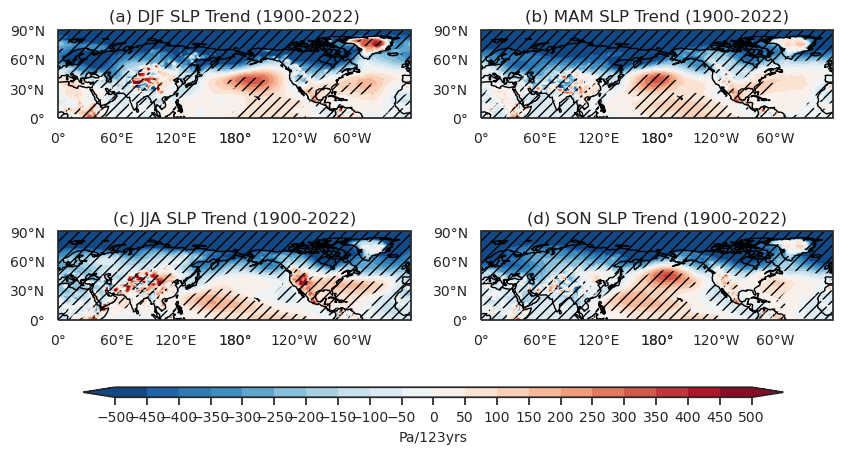

In [24]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
sns.set_theme(style="white")

# Create a new figure and axis
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.2, hspace=0.1) 

# Define the levels and colormap
levels = np.arange(-500.0, 550.0, 50)
cmap = ListedColormap(sns.color_palette("RdBu_r", n_colors=len(levels)-1).as_hex())

sig_levels = np.array([-0.05, 0.05])
sig_cmap = ListedColormap(['none', 'none'])

# Loop through each season and plot the data
for i, season in enumerate(['DJF', 'MAM', 'JJA', 'SON']):
    trend_data = globals()[f'trend_{season}_data']
    sig_data = globals()[f'sig_{season}_data']
    # Create a new subplot for the current season
    ax = fig.add_subplot(gs[i//2, i%2], projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.coastlines()
    # ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='white')
    ax.set_title(season, fontsize=10, fontweight='medium')
    
    # Plot the trend data for the current season
    trend_contours = ax.contourf(trend_data['longitude'], trend_data['latitude'], trend_data, levels=levels, cmap=cmap, extend='both', transform=ccrs.PlateCarree())

    # Plot the significant test results for the current season
    sig_contours = ax.contourf(sig_data['longitude'], sig_data['latitude'], sig_data, levels=sig_levels, hatches=['', '///'], cmap=sig_cmap, extend='both', transform=ccrs.PlateCarree())
    
    ax.xaxis.set_major_formatter(cticker.LongitudeFormatter())
    ax.yaxis.set_major_formatter(cticker.LatitudeFormatter())
    ax.tick_params(labelsize=10)
    # Remove x label for upper plots and y label for right plots
    if i in [0, 1]:
        ax.set_xlabel('')
    if i in [1, 3]:
        ax.set_ylabel('')
    # Set the title of the plot
    plt.title(f'({chr(97+i)}) {season} SLP Trend (1900-2022)')

# Add a colorbar to the figure for trend values
trend_cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])
trend_cbar = fig.colorbar(trend_contours, cax=trend_cbar_ax, orientation='horizontal', ticks=levels)
trend_cbar.ax.tick_params(labelsize=10)
trend_cbar.set_label('Pa/123yrs', fontsize=10)

# Save the figure
plt.savefig('1900-2022_seasonal_slp_trend_pattern.png', dpi=300, bbox_inches='tight')
plt.show()
